# Week 6

## Objectives so far
* Code a graph generator for Unity
* Code force fields in Unity
* Code Lennard-Jones forces for polymer chain entanglement
* Code Brownian motion of polymer chains
* Research the steps of crystallisation of cellulose acetate or thermoplastic starch
* Read and update myself on the literature

## July 18

>**Title:** Machine Learning Force Fields: Recent Advances and Remaining Challenges
>
>**Author(s):** Igor Poltavsky and Alexandre Tkatchenko
>
>**Link:** [PDF Article](https://pubs.acs.org/doi/pdf/10.1021/acs.jpclett.1c01204)
>
>**Important Points:**
>* ML models have long demonstrated increased data efficiency when compared to collecting data sets through experimental methods.
>* Combining ML models with analytical and computational physics/chemistry has allowed a substantial extension in the range of accessible applications: accelerated statistical sampling, exact MLFFs (molecular force fields) for small molecules, accurate phase diagrams for unified FF, data-driven protein folding.
>* The paper then goes on to describe certain similarities between ML methods used in cheminformatics with traditional approximate techniques existing to study quantum-mechanical systems in practice. In particular, they make the following assertion: $$\overrightarrow{O}=\langle\Psi(\overrightarrow{x})|\widehat{O}|\Psi(\overrightarrow{x})\rangle \iff \overrightarrow{O}=\textbf{m}(\overrightarrow{d})$$ where $\widehat{O}$ is the quantum-mechanical operator; $\Psi$ is the system wave function depending on all DOFs; $\textbf{m}$ is the ML model, and $d$ is the descriptor to encode the DOFs.
>* The paper goes on to discuss the use of multiple machine learning models to solve for potential energy surface (PES) of multiple compounds by using sGDML models (Symmetric Gradient Domain Machine Learning).
>* Finally the paper does discuss some of the drawbacks of ML models and limitations to overcome (e.g. incorporating these physical laws into ML models). One in particular is the discussion regarding the long-distance equivalent framework. Might be unapplicable to our architecture.

## July 19

>**Title:** Coarse-Grained Simulations of Model Polymer Nanofibres
>
>**Author(s):** Alberto Milani, Mosè Casalegno, Chiara Castiglioni, Guido Raos
>
>**Link:** [PDF Article](https://nbviewer.org/github/LouisTheLuis/MCSC-Summer-2022/blob/master/Summaries/Coarse%E2%80%90Grained_Simulations_of_Model_Polymer_Nanofibres.pdf)
>
>**Important Points:**
>* The researchers mainly wanted to perform molecular dynamics simulations of model polycaprolactam (polyamide-6 or nylon-6, also known as NY6).  
>* In order to model this polymer, the researchers decided to use the MARTINI force field model with some small modifications:
>    * They mapped 4-to-1 atoms to beads in an iterative way; assigning beads to polar or apolar spherical beads (no charged nor nonpolar). 
>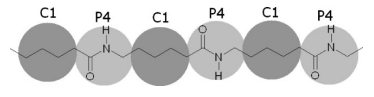
>    * For the intermolecular interactions, the adopted the Lennard-Jones interactions using the following formula to represent the non-bonded interactions between the CG beads: $$V_{n.b} = \sum_{i<j}V_{ij}^{LJ} = \sum_{i<j}[4\epsilon_{ij}[(\frac{r_{ij}}{\sigma})^{12}-(\frac{r_{ij}}{\sigma})^6]-V_{cut}]$$ where $r_{ij}$ is the interparticle distance, $\sigma$ is the LJ diameter (= 0.47nm), $\epsilon_{ij}$ is the Lj well depths adjusted so as to reproduce a large set of experimental thermodynamic data, and $V_{cut}$ is a constant chosen so that the potential energy is continuous.
>    * For the intramolecular interactions (i.e. bonded interactions), we have bond stretching and bond angle terms. These however, depend on *a priori* assignment of secondary structure motifs. For this reason, the researchers decided to generate their own stretching and bending potentials by Boltzmann inversion of an all-atom simulation of a short NY6 chain.  They did this using the Tinker 4.2 package and the OPLS-AA force field for a simluation. They obtained the potentials $$V_{stretch}(r) = -RTln[W_{stretch}(r)/r^2]+C$$ $$V_{bend}(θ) = -RTln[W_{bend}(θ)/sin(θ)]-V_{12}^{LJ}(2r_{eq}cosθ)+C'$$
>* The entire simulation was performed using GROMACS 4 package.
>* **NOTE:** GROMACS can be an useful tool to perform molecular dynamics simulations on Python. Check it [here](https://www.gromacs.org/index.html).
>* The results of the simulations were somewhat succesful due to limitations of the model itself.

>**Title:** Structural investigation of semicrystalline polymers
>
>**Author(s):** J. Molnar, Z. Zuba, O. Sepsi, F. Ujhelyi, G. Erdei, S. Lenk, A. Menyhard
>
>**Link:** [PDF Article](https://www.sciencedirect.com/science/article/pii/S0142941821000489)
>
>**Important Points:**
>* Some of the most frequently used polymers are semicrystalline materials, which always consist of amorphous and crystalline fractions. Their crystallinity can vary in the proportion of the molecule itself (e.g. from 10% to 80%; never reaching 100%). Their properties are dependent on thier crystalline structure.
>* Sample preparation is important for semicrystalline materials. Some for polymers do not require some unique pre-treatment (OM, DF and POM) while others for larger magnifications require special pre-treatments.
>* The researchers go over multiple preparation methods for polymer characterization investigation techniques. 
>* Then, using isotactic polypropylene (iPP) as the model material, they studied well-developed spherulites to study through the previous mentioned methods.

There is also a Github python suite for the generation and facilitation of coarse-grained simulations for synthetic polymers online. The name is Polyply, and it is available [here](https://github.com/marrink-lab/polyply_1.0). How much can it be integrated into the current work is still unclear.

An additional useful article was shared by Andy, which refers to a novel idea: using real-life simulations (or any sort of simulation, really) in a sort of GAN architecture that would be constrained by chemical/physical equations. Thus, allowing for an improved simulation of the molecular dynamics.

>**Title:** Learning an Accurate Physics Simulator via Adversarial Reinforcement Learning
>
>**Author(s):** Yifeng Jiang, and Jie Tan
>
>**Link:** [PDF Article](https://ai.googleblog.com/2021/06/learning-accurate-physics-simulator-via.html)
>
>**Important Points:**
>* The researchers wanted to improve the physical skills of a robot they had. In order to improve the performance of the ML model that allowed this robot to move, they created this Hybrid-model.
>* For this hybrid model, they replaced the pre-set simulation physical constants for the physics equations of the reinforcement learning model by a GAN architecture where they generate the simulation physical constant and run it against a discriminator formed by real-life simulation data.

Using this previously mentioned article, I decided to look more into All-Atom simulations; ways to perform them, and ways to obtain information from them. From the previously mentioned coarse-grain polymer nanofibres paper, I decided to check the **Tinker Molecular Modeling Package**, seen [here](https://dasher.wustl.edu/tinker/). I think, for thermoplastic starch —if we decide to stick with it, that is— we can utilize the package with the OPLS-AA force field to conduct simulations of an oligomer in the conditions we want. They also have a Github [here](https://github.com/TinkerTools).

After reading part of the Tinker guide I had the following takeaways:
* The molecule would be handwritten into the simulation.
* The calculations that it can perform are the following: energy minimization, structural optimization, molecular dynamics, stochastic dynamics, energy distribution.
* The output files are generally made on sample files ``SAMPLE.001, SAMPLE.002, ...`` and so on. 

## July 20

Another paper shared by Andy yesterday that might build on what was written just before is the following:

>**Title:** Machine Learning of Coarse-Grained Molecular Dynamics Force Fields
>
>**Author(s):** Jiang Wang, Simon Olsson, Christoph Wehmeyer, Adrià Pérez, Nicholas E. Charron, Gianni de Fabritiis, Frank Noé, and Cecilia Clementi
>
>**Link:** [PDF Article](https://pubs.acs.org/doi/pdf/10.1021/acscentsci.8b00913)
>
>**Important Points:**
>* The reduction in dimensions produced by CG model hinders the capability to reproduce the potential energy surfaces from quantum calculations in an atomistic model.
>* Thus, this research paper formulates the procedure for coarse-graining as a supervised machine learning problem, using classical statistical learning theory to show that the force-matching error can be decomposed into Bias, Variance and Noise terms that explain their physical meaning.
>* In addition to this, the researchers discuss their own neural network architecture: *CGNets*; which in contrast tot potential energy networks, predicts a free energy and then uses the gradient of this free energy to compute a mean force to the CG coordinates.
>* As a last addition, to avoid catastrophically wrong force predictions for configurations not captured by training data, they add a regularization factor by adding a prior energy to the free energy network.
>* *THEORY:*
>     * By coarse-graining the researchers define the coordinate transformationn to a lower dimensional space $$\textbf{x} = \xi(r) ∈ \mathbb{R}^{3n}$$ where $\textbf{r}∈\mathbb{R}^{3N}$ is the atomistic description of the system and $\textbf{x}$ is the coarse-grained description of the system. We can even define a coarse-graining matrix $\Xi$ such that $\textbf{x} = \Xi\textbf{r}$.
>     * Let $\theta$ be the parameters of the coarse-grained model (i.e. the weights in the NN). We want to preserve te equilibrium distribution after coarse-graining (that is our *objective*) so we use the Boltzmann distributions of the potential: $$U(\textbf{x}, \textbf{θ}) \equiv -k_BTlnp^{CG}(\textbf{x}) + const$$
>     * After a lot of physics derivations and statistical mechanics assumptions, we arrive at the force-matching loss function: $$L(\theta; \textbf{R}) = \frac{1}{3Mn}\sum_{i=1}^{M}\lVert\xi(\textbf{F}(\textbf{r}_i)) +\nabla U(\xi(\textbf{r}_i); \textbf{θ})\rVert^2 = \frac{1}{3Mn}\lVert\xi(\textbf{F}(\textbf{R})) +\nabla U(\xi(\textbf{R}); \textbf{θ})\rVert_F^2$$ where $\xi(\textbf{R})$ and $\xi(\textbf{F}(\textbf{R}))$ are data matrices of coarse-grained coordinates and coarse-grained instantaneous forces respectively.
>* *NEURAL NETWORK STRUCTURE:*
>     * The structure is as follows: we train $U(\textbf{x}; \textbf{θ})$ using ``tanh`` activation functions and $D$ nonlinear layers.
>     * In CGNets we include a transformation $\textbf{y} = g(\textbf{x})$ from CG cartesian coordinates $\textbf{x}$ to a set of features with all desired invariances. Then, we use $\textbf{y}$ for the actual network that minimizes $U$.
>     * We compute the PMF conservative force using $$\hat{\textbf{f}}(\textbf{x}; \textbf{θ}) = - \nabla_{\textbf{x}}U(g(\textbf{x}); \textbf{θ})$$
>     * Then we simulate the CG model using Langevin dynamics to advance the coordinates from $\textbf{x}_t$ to $\textbf{x}_{t+\tau}$ using some equation.
>     * We add a baseline energy factor $U_0(\textbf{x})$ to account for unphysical predictions.
>     * Structure shown below.
>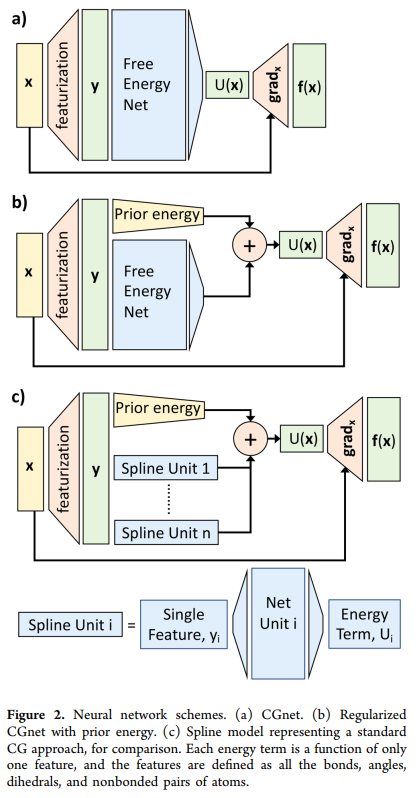
>* *RESULTS:* In both the 2D toy model, the coarse-graining of alanine dipeptide in water, and the coarse-graining of chignolin folding/unfolding in water, the researchers observed an improvement on the cross-validation error from CGNets in comparison to more traditional methods (using splines).

**NOTE:** It would be important to talk to Jehan and Elena to describe the intramolecular interactions in the MARTINI model in the particular case of thermoplastic starch or cellulose acetate. This would help for our toy model.

>**Title:** Measuring Flow-Induced Crystallization Kinetics of Polyethylene after Processing
>
>**Author(s):** Kenneth L. Kearns, Justin Scherzer, Marius Chyasnavichyus, Daria Monaenkova, Jonathan Moore, Robert L. Sammler, Tom Fielitz, David A. Nicholson, Marat Andreev, and Gregory C. Rutledge
>
>**Link:** [PDF Article](https://pubs.acs.org/doi/pdf/10.1021/acs.macromol.0c02477)
>
>**Important Points:**
>* **NOTE:** Admittedly, this paper is beyond my field of knowledge. Thus, I will read the abstract and the conclusion and take a quick skim over the body of the paper. I do not expect full understanding of the paper itself and the notes will be brief.
>* 

## July 21